In [ ]:
# Instalando biblioteca necessária

!pip install --upgrade gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [ ]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import calendar
import matplotlib.dates as mdates

Integrando com o Google Sheets para importar a planilha com a base de dados

In [ ]:
# Autenticando

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# importando a planilha

spreadsheet = gc.open('Base de Dados - Desafio Digital')

importando as abas e criando os DataFrames

In [ ]:
# aba Vendas
aba2 = spreadsheet.get_worksheet(1)
dados_aba2 = aba2.get_all_values()
df_aba2 = pd.DataFrame(dados_aba2[1:], columns=dados_aba2[0])

# aba Vendedores
aba3 = spreadsheet.get_worksheet(2)
dados_aba3 = aba3.get_all_values()
df_aba3 = pd.DataFrame(dados_aba3[1:], columns=dados_aba3[0])

# Imprimir os DataFrames
print("Base Vendas:")
print(df_aba2.head())

print("Base Vendedores:")
print(df_aba3.head())


Base Vendas:
  Centro            Unidade     Produto Valor unitário Cod_vendedorr Qtd  \
0    101            Avenida  Brinquedos      R$ 400,00         49590  17   
1    103        Cidade Nova       Berço      R$ 690,00         55354  14   
2    106            Avenida       Fogão    R$ 1.834,00         19231   3   
3    104            Avenida   Powerbank      R$ 120,00         19231   5   
4    104  Amazonas Shopping   Mi Band 6      R$ 400,00         15176  20   

  Data_compra  
0   4/25/2021  
1   3/24/2021  
2   3/31/2021  
3   6/16/2021  
4   2/24/2022  
Base Vendedores:
  Cod_vendedor  Vendedor
0        17988   Luciana
1        14522   Marcela
2        15176   Larissa
3         5657   Vanessa
4         4428  Giovanna


In [ ]:
# Ajustando nome da coluna "Cod_vendedorr" na base de vendas

df_aba2 = df_aba2.rename(columns={'Cod_vendedorr': 'Cod_vendedor'})


In [ ]:


# Mesclando as tabelas atráves do código do vendedor

df_mesclados = pd.merge(df_aba2, df_aba3, on='Cod_vendedor', how='left')

df_mesclados.head()

,Centro,Unidade,Produto,Valor unitário,Cod_vendedor,Qtd,Data_compra,Vendedor
0,101,Avenida,Brinquedos,"R$ 400,00",49590,17,4/25/2021,Cintia
1,103,Cidade Nova,Berço,"R$ 690,00",55354,14,3/24/2021,Anderson
2,106,Avenida,Fogão,"R$ 1.834,00",19231,3,3/31/2021,Cristina
3,104,Avenida,Powerbank,"R$ 120,00",19231,5,6/16/2021,Cristina
4,104,Amazonas Shopping,Mi Band 6,"R$ 400,00",15176,20,2/24/2022,Larissa


In [ ]:
# verificando o tipo dos dados das colunas

df_mesclados.dtypes

Centro            object
Unidade           object
Produto           object
Valor unitário    object
Cod_vendedor      object
Qtd               object
Data_compra       object
Vendedor          object
dtype: object

In [ ]:
# ajustando o tipo dos dados

# convertendo o dataframe para string
df_mesclados.astype(str)

# convertendo valores de colunas

# Convertendo em float
df_mesclados['Valor unitário'] = df_mesclados['Valor unitário'].str.replace('R\$', '').str.replace('.', '').str.replace(',', '.')
df_mesclados['Valor unitário'] = df_mesclados['Valor unitário'].astype(float)

# Convertendo em int
df_mesclados['Qtd'] = df_mesclados['Qtd'].astype(int)


<ipython-input-26-ff08b77bc921>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mesclados['Valor unitário'] = df_mesclados['Valor unitário'].str.replace('R\$', '').str.replace('.', '').str.replace(',', '.')
<ipython-input-26-ff08b77bc921>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_mesclados['Valor unitário'] = df_mesclados['Valor unitário'].str.replace('R\$', '').str.replace('.', '').str.replace(',', '.')


In [ ]:
# verificando ajustes

df_mesclados.dtypes

Centro             object
Unidade            object
Produto            object
Valor unitário    float64
Cod_vendedor       object
Qtd                 int64
Data_compra        object
Vendedor           object
dtype: object

In [ ]:
# Ajustando nomes dos produtos com erros

substituicoes = {
    'Ar_condicionado': 'Ar condicionado',
    'Cadeira%Gamer': 'Cadeira Gamer',
    'Fone d Ouvido': 'Fone de Ouvido',
    'samsungsamsung': 'Samsung',
    'XBOX SERIESSSS': 'Xbox series s'
}

df_mesclados['Produto'] = df_mesclados['Produto'].replace(substituicoes)

unidade = {'Ammazonas Shoping': 'Amazonas Shopping'}

df_mesclados['Unidade'] = df_mesclados['Unidade'].replace(unidade)

# ajustando restante de nomes de produtos com nomes errados

produtos = {'IPHOne':'Iphone','iPHONE':'Iphone', 'SAMSUNG':'Samsung' }

df_mesclados['Produto'] = df_mesclados['Produto'].replace(produtos)



In [ ]:
df_mesclados

,Centro,Unidade,Produto,Valor unitário,Cod_vendedor,Qtd,Data_compra,Vendedor,Receita,Imposto
0,101,Avenida,Brinquedos,400.0,49590,17,4/25/2021,Cintia,6800.0,20.00
1,103,Cidade Nova,Berço,690.0,55354,14,3/24/2021,Anderson,9660.0,34.50
2,106,Avenida,Fogão,1834.0,19231,3,3/31/2021,Cristina,5502.0,91.70
3,104,Avenida,Powerbank,120.0,19231,5,6/16/2021,Cristina,600.0,6.00
4,104,Amazonas Shopping,Mi Band 6,400.0,15176,20,2/24/2022,Larissa,8000.0,20.00
...,...,...,...,...,...,...,...,...,...,...
894,102,Cidade Nova,Bicicleta,1200.0,55354,10,6/19/2021,Anderson,12000.0,60.00
895,106,Avenida,Bebedouro,550.0,2592,3,9/21/2021,Miqueias,1650.0,27.50
896,101,Eduardo Gomes,Mouse,47.0,11022,9,2/27/2021,Cléberson,423.0,2.35
897,104,Amazonas Shopping,Powerbank,120.0,5657,15,6/11/2021,Vanessa,1800.0,6.00


# Respondendo perguntas

# 1ª - Qual o imposto total a ser pago pela empresa? Qual o imposto por unidade?

In [ ]:
# criando tabela de imposto

tabela_imposto = pd.DataFrame({
    'Alíquota': [0.05, 0.12, 0.17],
    'Faixa_inicial': [0, 2100000.01, 2400000.01],
    'Faixa_final': [2100000, 2400000, float('inf')]
})

print(tabela_imposto)

   Alíquota  Faixa_inicial  Faixa_final
0      0.05           0.00    2100000.0
1      0.12     2100000.01    2400000.0
2      0.17     2400000.01          inf


In [ ]:
# Calculando a receita

df_mesclados['Receita'] = df_mesclados['Valor unitário'] * df_mesclados['Qtd']

receita_total = df_mesclados['Receita'].sum()

df_mesclados['Receita'] = df_mesclados['Valor unitário'] * df_mesclados['Qtd']
receita_total = df_mesclados['Receita'].sum()

# Converter o valor da receita total em formato de milhar
receita_total_formatada = "{:,.2f}".format(receita_total).replace(',', '.')

print("A receita total é de R$ {}".format(receita_total_formatada))



A receita total é de R$ 13.557.158.00


In [ ]:
# Função que  calcula o imposto

def calcular_imposto(receita_total):
    for _, row in tabela_imposto.iterrows():
        if row['Faixa_inicial'] <= receita_total <= row['Faixa_final']:
            return row['Alíquota'] * receita_total
    return 0



In [ ]:
# Aplica a função de cálculo do imposto para cada venda
df_mesclados['Imposto'] = df_mesclados['Receita'].apply(calcular_imposto)

# Calcula o total de imposto pago pelas vendas
total_imposto = df_mesclados['Imposto'].sum()

# Formata o total de imposto com o símbolo 'R$'
total_imposto_formatado = f'R$ {total_imposto:.2f}'

# Imprime o total de imposto formatado
print('Total de Imposto Pago:', total_imposto_formatado)

Total de Imposto Pago: R$ 677857.90


In [ ]:
# Calculando o total de impostos por Unidade

total_imposto_unidade = df_mesclados.groupby('Unidade')['Receita'].apply(lambda x: x.apply(calcular_imposto).sum())
total_imposto_unidade_formatado = total_imposto_unidade.apply(lambda x: 'R$ {:.2f}'.format(x))
print('Total de Imposto por Unidade:')
print(total_imposto_unidade_formatado)

Total de Imposto por Unidade:
Unidade
Amazonas Shopping     R$ 94784.45
Avenida              R$ 107570.80
Cidade Nova          R$ 112951.25
Eduardo Gomes        R$ 148140.35
Matriz               R$ 100321.85
Nova cidade          R$ 114089.20
Name: Receita, dtype: object


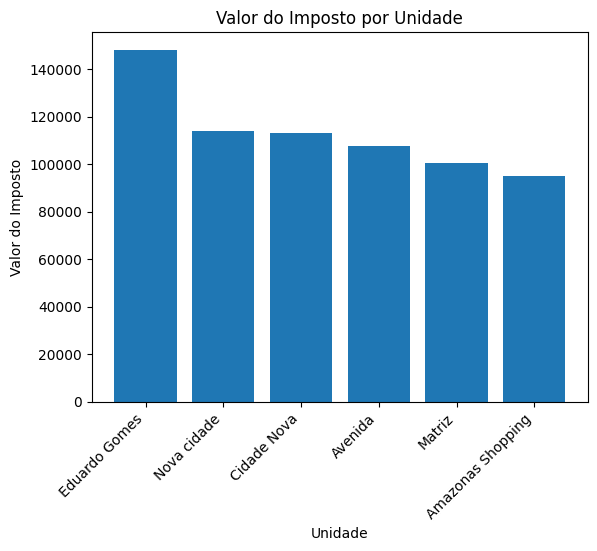

In [ ]:
# Criando gráfico para a visualização dos dados

# Ordena o DataFrame em ordem decrescente
total_imposto_unidade = total_imposto_unidade.sort_values(ascending=False)

# Cria o gráfico de barras em ordem decrescente
plt.bar(total_imposto_unidade.index, total_imposto_unidade)


# Define o título e os rótulos dos eixos
plt.title('Valor do Imposto por Unidade')
plt.xlabel('Unidade')
plt.ylabel('Valor do Imposto')

plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

# 2ª - Qual o produto que mais vende?

In [ ]:
# Obter a lista de nomes de produtos distintos
produtos_distintos = df_mesclados['Produto'].unique()
display(produtos_distintos)

array(['Brinquedos', 'Berço', 'Fogão', 'Powerbank', 'Mi Band 6',
       'Samsung', 'Sofá', 'Microondas', 'Xbox series s', 'Cadeira Gamer',
       'Ar condicionado', 'Bicicleta', 'Iphone', 'Televisão', 'Mouse',
       'Teclado', 'Monitor', 'Cama', 'Geladeira', 'Fone de Ouvido',
       'Bebedouro', 'Guarda Roupa', 'Notebook', 'Jogo de Panela'],
      dtype=object)

In [ ]:
# Calculando qual produto possui mais vendas

total_vendas_produto = df_mesclados.groupby('Produto')['Qtd'].sum()

# Encontra o produto com a maior quantidade de vendas
produto_mais_vendido = total_vendas_produto.idxmax()

# Exibe o produto com mais vendas
print(total_vendas_produto)

print("O produto com mais vendas é:", produto_mais_vendido)

Produto
Ar condicionado    436
Bebedouro          454
Berço              335
Bicicleta          375
Brinquedos         474
Cadeira Gamer      388
Cama               346
Fogão              433
Fone de Ouvido     314
Geladeira          373
Guarda Roupa       354
Iphone             484
Jogo de Panela     498
Mi Band 6          491
Microondas         341
Monitor            275
Mouse              373
Notebook           256
Powerbank          402
Samsung            352
Sofá               422
Teclado            449
Televisão          351
Xbox series s      427
Name: Qtd, dtype: int64
O produto com mais vendas é: Jogo de Panela


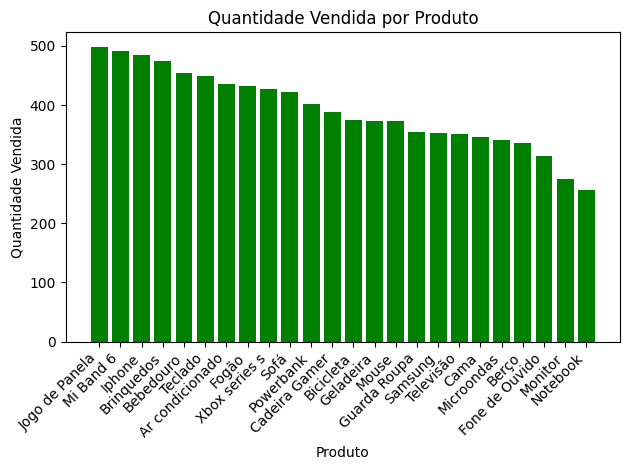

In [ ]:
# Criando gráfico para visualizar a quantidade de vendas por produto

# Ordena os valores em ordem decrescente
total_vendas_produto = total_vendas_produto.sort_values(ascending=False)

# Cria o gráfico de barras em ordem decrescente
cor = 'green'
plt.bar(total_vendas_produto.index, total_vendas_produto, color=cor)

# Define o título e os rótulos dos eixos
plt.title('Quantidade Vendida por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')


# Ajusta o espaçamento entre os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# 3ª - Quanto cada produto representa sobre o total de vendas da empresa?

In [ ]:
# calculando vendas da empresa

total_vendas_empresa = total_vendas_produto.sum()
porcentagem_vendas_produto = (total_vendas_produto / total_vendas_empresa) * 100


# exibindo as porcentagens de venda

print("Porcentagem de Vendas por Produto:")
for produto, porcentagem in porcentagem_vendas_produto.items():
    print(f"{produto}: {porcentagem:.2f}%")


Porcentagem de Vendas por Produto:
Jogo de Panela: 5.30%
Mi Band 6: 5.22%
Iphone: 5.15%
Brinquedos: 5.04%
Bebedouro: 4.83%
Teclado: 4.78%
Ar condicionado: 4.64%
Fogão: 4.60%
Xbox series s: 4.54%
Sofá: 4.49%
Powerbank: 4.28%
Cadeira Gamer: 4.13%
Bicicleta: 3.99%
Geladeira: 3.97%
Mouse: 3.97%
Guarda Roupa: 3.76%
Samsung: 3.74%
Televisão: 3.73%
Cama: 3.68%
Microondas: 3.63%
Berço: 3.56%
Fone de Ouvido: 3.34%
Monitor: 2.92%
Notebook: 2.72%


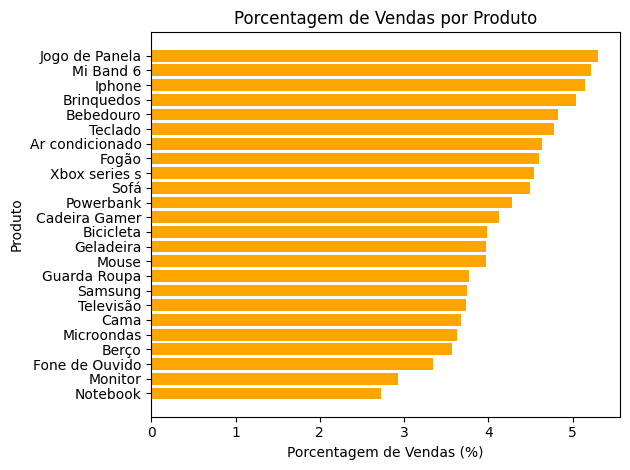

In [ ]:
# Criando gráfico para visualizar



porcentagem_vendas_produto = porcentagem_vendas_produto.sort_values(ascending=True)

cor = 'orange'
plt.barh(porcentagem_vendas_produto.index, porcentagem_vendas_produto, color=cor)

plt.title('Porcentagem de Vendas por Produto')
plt.xlabel('Porcentagem de Vendas (%)')
plt.ylabel('Produto')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# 4ª - Qual o lucro de cada loja após descontos de impostos?

In [ ]:
# Calculando o lucro

df_mesclados['Lucro'] = df_mesclados['Receita'] - df_mesclados['Imposto']

lucro_total_loja = df_mesclados.groupby('Centro')['Lucro'].sum()

lucro_total_loja_formatado = lucro_total_loja.map('R${:,.2f}'.format)

print("Lucro de cada loja após descontos de impostos:")
print(lucro_total_loja_formatado)

Lucro de cada loja após descontos de impostos:
Centro
101    R$1,983,261.80
102    R$2,297,694.70
103    R$1,803,690.90
104    R$2,460,627.30
105    R$2,064,914.30
106    R$2,269,111.10
Name: Lucro, dtype: object


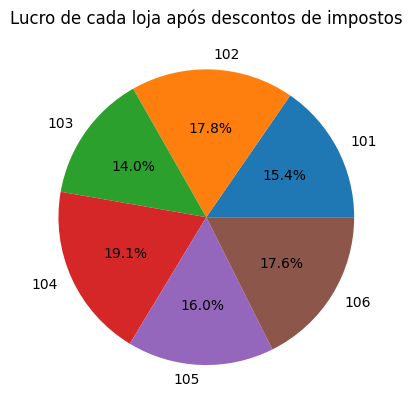

In [ ]:
# criando gráfico para visualização

# Criando o gráfico de pizza
plt.pie(lucro_total_loja, labels=lucro_total_loja.index, autopct='%1.1f%%')


plt.title('Lucro de cada loja após descontos de impostos')

# Exibir o gráfico
plt.show()

# Qual o período que cada loja mais vendeu em R$ e qual o valor?

In [ ]:



df_mesclados['Data_compra'] = pd.to_datetime(df_mesclados['Data_compra'])


receita_por_mes = df_mesclados.groupby(pd.Grouper(key='Data_compra'))['Receita'].sum()

mes_maior_receita = receita_por_mes.idxmax().strftime('%B de %Y')


receita_por_mes_formatada = receita_por_mes.map('R${:,.2f}'.format)

# Exibir a receita por mês formatada
print("Receita por período:")
print(receita_por_mes_formatada)
print("Período com maior vendas:", mes_maior_receita)


Receita por período:
Data_compra
2021-04-25    R$21,200.00
2021-03-24    R$59,985.00
2021-03-31    R$74,367.00
2021-06-16     R$5,840.00
2022-02-24    R$79,049.00
                 ...     
2021-08-21    R$13,600.00
2021-12-15     R$4,950.00
2021-05-11     R$8,280.00
2021-01-23    R$13,600.00
2021-04-14    R$24,800.00
Name: Receita, Length: 379, dtype: object
Período com maior vendas: May de 2021


In [ ]:
df_mesclados['Data'] = pd.to_datetime(df_mesclados['Data'])
df_mesclados['Ano_Mes'] = df_mesclados['Data'].dt.to_period('M')
receita_por_periodo = df_mesclados.groupby('Ano_Mes')['Receita'].sum()


periodo_maior_receita = receita_por_periodo.idxmax()
nome_mes = calendar.month_name[periodo_maior_receita.month]


receita_maior_periodo_formatada = "{:,.2f}".format(receita_por_periodo[periodo_maior_receita]).replace(',', '.')

print("O período com a maior receita foi {} de {} com receita de R$ {}".format(nome_mes, periodo_maior_receita.year, receita_maior_periodo_formatada))

O período com a maior receita foi March de 2021 com receita de R$ 1.288.780.00


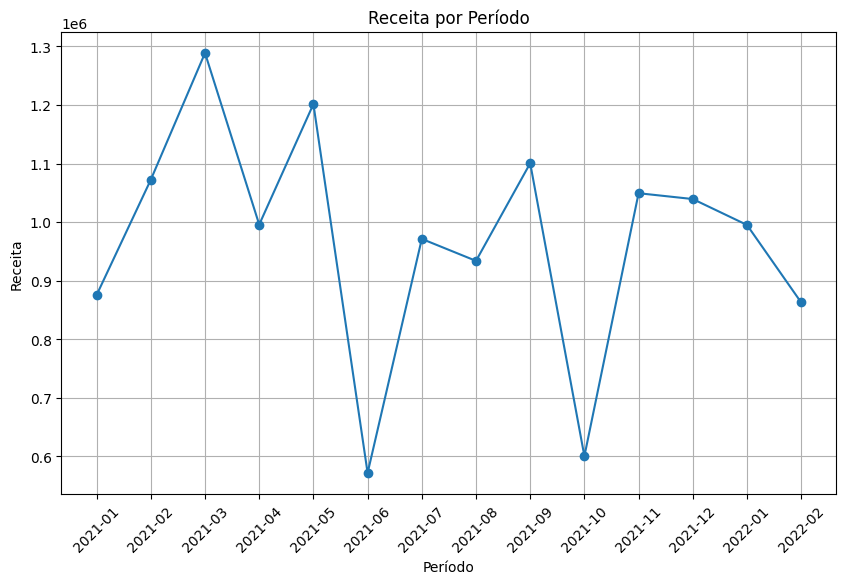

In [ ]:

periodos = [str(periodo) for periodo in receita_por_periodo.index]

plt.figure(figsize=(10, 6))
plt.plot(periodos, receita_por_periodo.values, marker='o')
plt.xlabel('Período')
plt.ylabel('Receita')
plt.title('Receita por Período')
plt.xticks(rotation=45)
plt.grid(True)

# Exibir o gráfico
plt.show()